# Introduction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [2]:
#0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral
emotions={0:'Angry', 1:'Disgust', 2:'Fear', 3:'Happy', 4:'Sad', 5:'Surprise', 6:'Neutral'}
url='https://github.com/emrekds/facial-expression-detection/blob/main/fer2013.csv?raw=true'
df=pd.read_csv(url)

## Explorotary Analysis

In [3]:
df.head(10)

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
5,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...,Training
6,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training
7,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training
8,3,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training
9,2,255 254 255 254 254 179 122 107 95 124 149 150...,Training


In [4]:
df.describe()

,emotion
count,35887.000000
mean,3.323265
std,1.873819
min,0.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,6.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
 2   Usage    35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


In [6]:
df['emotion'].value_counts(normalize=True)

3    0.250481
6    0.172709
4    0.169337
2    0.142698
0    0.138017
5    0.111517
1    0.015242
Name: emotion, dtype: float64

In [7]:
import seaborn as sns

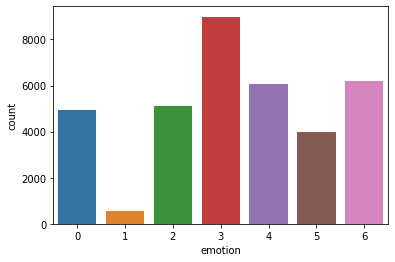

In [8]:
sns.countplot(df.emotion);

In [9]:
df['Usage'].value_counts(normalize=True)

Training       0.799983
PublicTest     0.100008
PrivateTest    0.100008
Name: Usage, dtype: float64

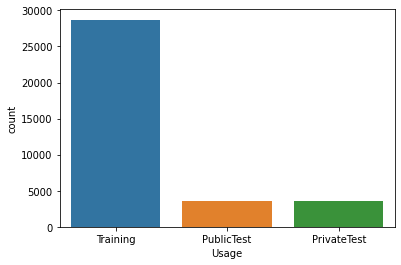

In [10]:
sns.countplot(df.Usage);

In [11]:
df.sample(5)

,emotion,pixels,Usage
2785,4,254 254 255 209 169 173 145 135 81 54 52 57 47...,Training
30019,6,35 35 36 32 38 64 63 84 92 119 93 60 64 62 60 ...,PublicTest
2019,6,253 250 254 174 99 117 109 79 52 41 53 82 116 ...,Training
18934,3,78 71 58 30 14 10 5 1 4 2 7 89 123 111 125 134...,Training
33068,3,19 28 31 26 36 56 38 36 39 37 36 43 43 37 40 3...,PrivateTest


In [12]:
len(df['pixels'][0].split())

2304

## Changing Pixels 

In [13]:
df['pixels']=df['pixels'].apply(lambda x:((np.reshape(x.split(),(48,48,1))).astype(np.float32))/255) 

In [14]:
df['pixels']

0        [[[0.27450982], [0.3137255], [0.32156864], [0....
1        [[[0.5921569], [0.5882353], [0.5764706], [0.60...
2        [[[0.90588236], [0.83137256], [0.6117647], [0....
3        [[[0.09411765], [0.1254902], [0.14117648], [0....
4        [[[0.015686275], [0.0], [0.0], [0.0], [0.0], [...
                               ...                        
35882    [[[0.19607843], [0.14117648], [0.06666667], [0...
35883    [[[0.69803923], [0.68235296], [0.6745098], [0....
35884    [[[0.06666667], [0.06666667], [0.0627451], [0....
35885    [[[0.11764706], [0.10980392], [0.10980392], [0...
35886    [[[0.07450981], [0.050980393], [0.05490196], [...
Name: pixels, Length: 35887, dtype: object

In [15]:
img1=df['pixels'][100]

In [16]:
img1.nbytes

9216

## Sample pictures

In [17]:
index=df.sample(10).index

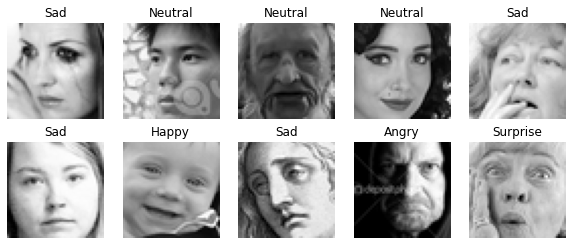

In [18]:
plt.figure(figsize=(10,4))
x,y=2,5
for i in range(10):
    plt.subplot(x,y,i+1)
    plt.imshow(df['pixels'][index[i]],cmap='gray')
    plt.title(emotions[df.iloc[index[i]]['emotion']])
    plt.axis('off')

# Preparing Data

In Kaggle competitions, only the training and test dataset is shared with the competitors.<br>
Competitor cannot see the private test set. And the performance of the model is measured by private test.

In [19]:
train=df[df['Usage']=='Training']
test=df[df['Usage']=='PublicTest']
p_test=df[df['Usage']=='PrivateTest']

In [20]:
from tensorflow.keras.utils import to_categorical

Changing shape of the X values from (28709,) to (28709,48,48) <br>
And then to (-1,48,48,1). Its necessary for tensorflow model. <br>
Also changing y values to categorical.


In [21]:
X_train=np.array([i.reshape(48,48) for i in (train['pixels'])]).reshape(-1,48,48,1)
X_test=np.array([i.reshape(48,48) for i in (test['pixels'])]).reshape(-1,48,48,1)
y_train=to_categorical(train['emotion'])
y_test=to_categorical(test['emotion'])

Final check on the values.

In [22]:
X_train.shape,X_test.shape

((28709, 48, 48, 1), (3589, 48, 48, 1))

In [23]:
y_train.shape,y_test.shape

((28709, 7), (3589, 7))

Everything is set for building model.

# Modelling

In [24]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

Model Build<br>
32conv+32conv+64conv with relu.<br>
64conv+64conv+128conv with relu<br>
256conv+flatten with relu<br>
fully connected 128 neurons+ 256 neurons with swish<br>
Since strides of some convolutions is 2 and padding is valid i dont use any pooling. And i use batch normalization after every convolution.<br>
Final look of our model with shape (3,3,256)<br>
Optimizer : Adam

## Creating Sequantial

In [25]:
model=Sequential()

model.add(Conv2D(filters=32,kernel_size=3,strides=1,padding='same',input_shape=(48,48,1),activation='relu'))
model.add(BatchNormalization())

model.add(Conv2D(filters=32,kernel_size=3,strides=1,padding='same',activation='relu'))
model.add(BatchNormalization())

model.add(Conv2D(filters=64,kernel_size=5,strides=2,padding='valid',activation='relu'))
model.add(BatchNormalization())

model.add(Dropout(.5))


model.add(Conv2D(filters=64,kernel_size=3,strides=1,padding='same',activation='relu'))
model.add(BatchNormalization())

model.add(Conv2D(filters=64,kernel_size=3,strides=1,padding='same',activation='relu'))
model.add(BatchNormalization())

model.add(Conv2D(filters=128,kernel_size=5,strides=2,padding='valid',activation='relu'))
model.add(BatchNormalization())

model.add(Dropout(.5))


model.add(Conv2D(filters=256,kernel_size=5,strides=2,padding='valid',activation='relu'))
model.add(BatchNormalization())

model.add(Dropout(.5))

model.add(Flatten())

model.add(Dense(128,activation='swish'))

model.add(Dropout(.5))

model.add(Dense(256,activation='swish'))

model.add(Dropout(.5))

model.add(Dense(7,activation='softmax'))

In [26]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')

Saving checkpoints of where model performing best.

In [27]:
checkpoint_filepath = 'saved_models/'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        51264     
_________________________________________________________________
batch_normalization_2 (Batch (None, 22, 22, 64)        256       
_________________________________________________________________
dropout (Dropout)            (None, 22, 22, 64)        0

Since model will saved after best epoch we can keep the epoch high. So we won't be affected from overfitting.

## Fitting

In [29]:
model.fit(X_train,y_train,epochs=100,callbacks=[model_checkpoint_callback],validation_data=(X_test,y_test))

Epoch 1/100
898/898 [==============================] - 19s 17ms/step - loss: 1.9046 - accuracy: 0.2387 - val_loss: 1.6704 - val_accuracy: 0.3151
Epoch 2/100
898/898 [==============================] - 15s 17ms/step - loss: 1.7019 - accuracy: 0.3090 - val_loss: 1.5827 - val_accuracy: 0.4007
Epoch 3/100
898/898 [==============================] - 15s 17ms/step - loss: 1.5982 - accuracy: 0.3657 - val_loss: 1.4595 - val_accuracy: 0.4305
Epoch 4/100
898/898 [==============================] - 15s 16ms/step - loss: 1.5150 - accuracy: 0.3995 - val_loss: 1.5671 - val_accuracy: 0.3787
Epoch 5/100
898/898 [==============================] - 15s 17ms/step - loss: 1.4614 - accuracy: 0.4299 - val_loss: 1.4365 - val_accuracy: 0.4452
Epoch 6/100
898/898 [==============================] - 15s 17ms/step - loss: 1.4021 - accuracy: 0.4533 - val_loss: 1.3601 - val_accuracy: 0.4817
Epoch 7/100
898/898 [==============================] - 15s 17ms/step - loss: 1.3519 - accuracy: 0.4770 - val_loss: 1.3548 - val_ac

Loading weights of best performing model from checkpoint.

In [30]:
model.load_weights(checkpoint_filepath)

Saving model in h5 format. This way we can easily load and use model without fitting again.

In [31]:
model.save("best_model.h5")

## Model Performance

In [32]:
result=pd.DataFrame(model.history.history)

Losses

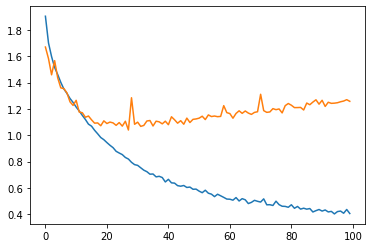

In [33]:
result.loss.plot()
result.val_loss.plot();

Accuracies

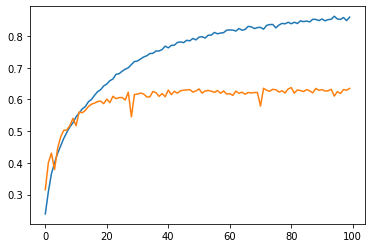

In [34]:
result.accuracy.plot()
result.val_accuracy.plot();

# Results

In [35]:
pred=np.argmax(model.predict(X_test),axis=1)

In [36]:
y_test=np.argmax(y_test,axis=1)

In [37]:
from sklearn.metrics import classification_report,confusion_matrix

In [38]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.54      0.57      0.55       467
           1       0.78      0.38      0.51        56
           2       0.50      0.41      0.45       496
           3       0.85      0.81      0.83       895
           4       0.51      0.58      0.54       653
           5       0.80      0.78      0.79       415
           6       0.56      0.61      0.59       607

    accuracy                           0.64      3589
   macro avg       0.65      0.59      0.61      3589
weighted avg       0.64      0.64      0.64      3589



In [39]:
print(confusion_matrix(y_test,pred))

[[264   3  43  20  78   8  51]
 [ 20  21   7   1   7   0   0]
 [ 63   1 201  15 118  40  58]
 [ 14   1  29 729  45  16  61]
 [ 72   1  54  29 379  10 108]
 [ 11   0  41  19  13 323   8]
 [ 43   0  31  47 109   6 371]]


## Private Test Results

In [40]:
private_x=(np.array([i.reshape(48,48) for i in (p_test['pixels'])])).reshape(-1,48,48,1)

In [41]:
private_y=p_test['emotion']

In [42]:
pred_p=np.argmax(model.predict(private_x),axis=1)

In [43]:
print(classification_report(private_y,pred_p))

              precision    recall  f1-score   support

           0       0.53      0.51      0.52       491
           1       0.74      0.47      0.58        55
           2       0.52      0.43      0.47       528
           3       0.87      0.84      0.85       879
           4       0.44      0.54      0.49       594
           5       0.78      0.75      0.76       416
           6       0.59      0.63      0.61       626

    accuracy                           0.63      3589
   macro avg       0.64      0.60      0.61      3589
weighted avg       0.64      0.63      0.63      3589



In [44]:
print(confusion_matrix(private_y,pred_p))

[[249   5  50  25  96  12  54]
 [ 20  26   3   1   5   0   0]
 [ 68   1 225  17 119  45  53]
 [ 24   0  15 736  47  16  41]
 [ 63   2  61  20 322   8 118]
 [  5   0  55  21  10 313  12]
 [ 41   1  22  25 131   9 397]]


## Mispredictions

In [45]:
df_result=pd.DataFrame()
df_result['predicted']=pred_p
df_result['expected']=list(private_y)

In [46]:
indexes=df_result[df_result['predicted']!=df_result['expected']].sample(15).index

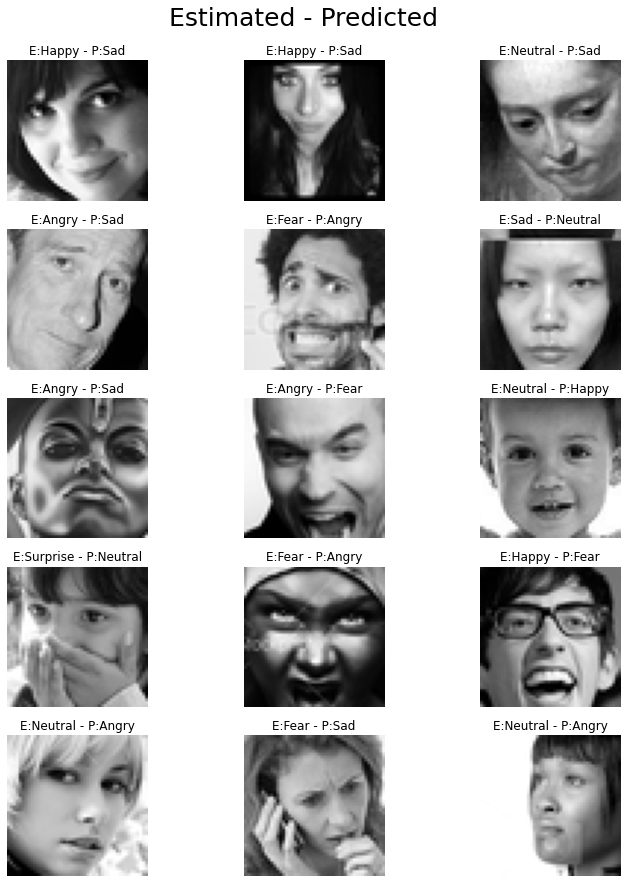

In [63]:
plt.figure(figsize=(12,15))
x,y=5,3
for i in range(15):
    plt.subplot(x,y,i+1)
    plt.imshow(p_test['pixels'].iloc[indexes[i]],cmap='gray')
    plt.title('E:'+emotions[p_test['emotion'].iloc[indexes[i]]]+ ' - ' +'P:'+ emotions[df_result['predicted'].iloc[indexes[i]]])
    plt.axis('off')
plt.suptitle('Estimated - Predicted',y=.93,fontsize=25);